Introduction

Kelp forests are some of the most biodiverse habitats in the world. This is because kelp are foundation species, meaning that they alter the structure of their habitat to support other organisms such as fish, invertebrates, and marine mammals. Kelp species compete for space and resources. Each species of kelp differs in shape and size, and therefore supports a unique group of organisms. Because of this it is important to study which kelps are competitively dominant under varying conditions so that we know how changing conditions impact the overall ecosystem. Much of kelp species competition occurs during their reproductive phase. Kelps reproduce sexually, meaning that they produce both sperm and eggs. When the eggs are fully mature, they produce a pheromone that both stimulates sperm release and its attraction to the egg. All kelp species release the same pheromone: Lamoxierene. The species whose egg matures first is the first to release the pheromone, and therefore will trigger sperm release from all reproductive kelps in the area, even though their eggs may not be fully developed. This can decrease or inhibit reproduction in the other species, as they will no longer have sperm to fertilize their eggs when they mature. The timing of egg maturation in kelp is dependent on abiotic factors. In the kelp forest light is highly variable, and has been shown to affect the reproductive phase of kelp species. Therefore, I am studying the effects of varying light levels on sexual competition between three kelp species in the Monterey Bay. 

Methods

Results

Settlement Density

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
import scipy as syp

In [11]:
settlement_density = pd.read_excel(r'MS263_FinalProject_Data_SettlementDensity.xlsx') #import settlement density dataset
print (settlement_density)

     Dish Culture_Type  Macro_Spores  Egregia_Spores
0       1         Mono            31              53
1       1         Mono            32              37
2       1         Mono            22              44
3       1         Mono            35              45
4       1         Mono            63              32
..    ...          ...           ...             ...
353    12         Poly            22              19
354    12         Poly            24               9
355    12         Poly            24              23
356    12         Poly            28              13
357    12         Poly            15              17

[358 rows x 4 columns]


In [12]:
M_SD = settlement_density.iloc[:, 1:3] #Subset so that data shows Macrocystis spores only
print(M_SD)
M_Mono_SD= M_SD[M_SD["Culture_Type"].isin(['Mono'])] #Subset so the data only shows Macrocystis Monocultures
M_Poly_SD= M_SD[M_SD["Culture_Type"].isin(['Poly'])] #Subset so the data only shows Macrocystis Polycultures

E_SD = settlement_density.iloc[:, np.r_[:,1,3]] #Subset so that data shows Egregia spores only
E_Mono_SD= E_SD[E_SD["Culture_Type"].isin(['Mono'])] #Subset so the data only shows Egregia Monocultures
E_Poly_SD= E_SD[E_SD["Culture_Type"].isin(['Poly'])] #Subset so the data only shows Egregia Polycultures

    Culture_Type  Macro_Spores
0           Mono            31
1           Mono            32
2           Mono            22
3           Mono            35
4           Mono            63
..           ...           ...
353         Poly            22
354         Poly            24
355         Poly            24
356         Poly            28
357         Poly            15

[358 rows x 2 columns]


In [13]:
#take the means of each subset created

M_Mono_SDMean = M_Mono_SD["Macro_Spores"].mean()
print(M_Mono_SDMean)
M_Poly_SDMean = M_Poly_SD["Macro_Spores"].mean()
print(M_Poly_SDMean)
E_Mono_SDMean = E_Mono_SD["Egregia_Spores"].mean()
print(E_Mono_SDMean)
E_Poly_SDMean = E_Poly_SD["Egregia_Spores"].mean()
print(E_Poly_SDMean)

41.597765363128495
18.51396648044693
31.592178770949722
18.480446927374302


In [14]:
#put the means into a new dataframe

m = {'Species': ['Macrocystis', 'Macrocystis', 'Egregia', 'Egregia'], 'Culture_Type':['Mono', 'Poly','Mono','Poly'], 'Av_SD/FOV':[M_Mono_SDMean,M_Poly_SDMean, E_Mono_SDMean, E_Poly_SDMean]}
means = pd.DataFrame(data=m)
means

,Species,Culture_Type,Av_SD/FOV
0,Macrocystis,Mono,41.597765
1,Macrocystis,Poly,18.513966
2,Egregia,Mono,31.592179
3,Egregia,Poly,18.480447


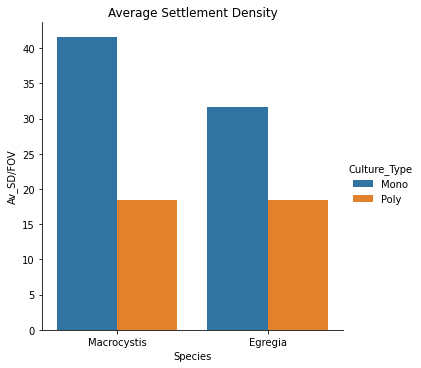

In [15]:
#Plot mean settlement density vs Species and culture type

sns.catplot(data=means, kind="bar", x="Species", y="Av_SD/FOV", hue="Culture_Type",).set(title='Average Settlement Density');

In [16]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jayceelanza/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [17]:
#Test for Normality
norm1= syp.stats.shapiro(M_Mono_SD['Macro_Spores'])
norm2= syp.stats.shapiro(M_Poly_SD['Macro_Spores'])
norm3= syp.stats.shapiro(E_Mono_SD['Egregia_Spores'])
norm4 = syp.stats.shapiro(E_Poly_SD['Egregia_Spores'])
print(norm1, norm2, norm3, norm4)
#The data is not normal

ShapiroResult(statistic=0.8972490429878235, pvalue=8.452759603372328e-10) ShapiroResult(statistic=0.9703751802444458, pvalue=0.0007373839034698904) ShapiroResult(statistic=0.9320408701896667, pvalue=1.8948259139506263e-07) ShapiroResult(statistic=0.9562023878097534, pvalue=2.3096692530089058e-05)


In [18]:
#Test for Homoscedasticity

In [19]:
#Run ANOVAs

Timing of Egg Production

In [20]:
#Import egg_timing dataset
egg_timing = pd.read_excel(r'MS263_FinalProject_Data_EggTiming.xlsx')
print (egg_timing)

     Species Culture_Type Light_Level  Day  Av_Eggs/FOV  Ratio_Mature
0      Macro         Mono         Low    1          0.0           0.0
1      Macro         Mono         Low    2          0.0           0.0
2      Macro         Mono         Low    3          0.0           0.0
3      Macro         Mono         Low    4          0.0           0.0
4      Macro         Mono         Low    5          0.0           0.0
..       ...          ...         ...  ...          ...           ...
571  Egregia         Poly   Very High   32          NaN           NaN
572  Egregia         Poly   Very High   33          NaN           NaN
573  Egregia         Poly   Very High   34          NaN           NaN
574  Egregia         Poly   Very High   35          NaN           NaN
575  Egregia         Poly   Very High   36          NaN           NaN

[576 rows x 6 columns]


In [21]:
egg_timing_good = egg_timing.dropna() #Eliminate NA data

In [22]:
#subset data into Macrocystis Monoculture and Macrocystis Polyculture
egg_timing_macro = egg_timing_good[egg_timing_good["Species"].isin(['Macro'])] #subset so that the data only includes Macro
et_macro_mono = egg_timing_macro[egg_timing_macro["Culture_Type"].isin(['Mono'])] #subset so that the data only includes Monocultures of Macro\
et_macro_poly = egg_timing_macro[egg_timing_macro["Culture_Type"].isin(['Poly'])] #subset so that the data only includes Polycultures of Macro

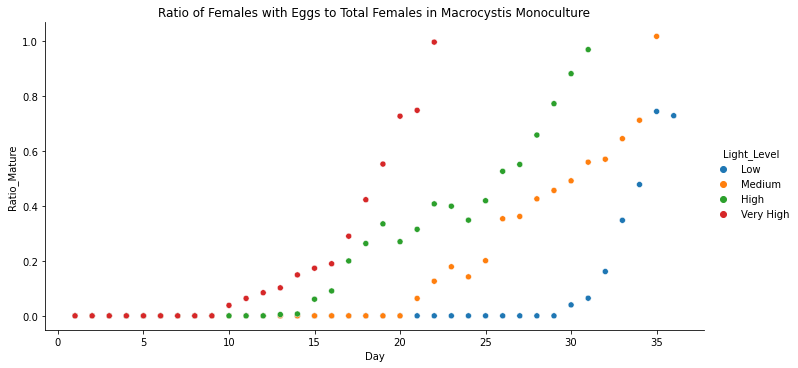

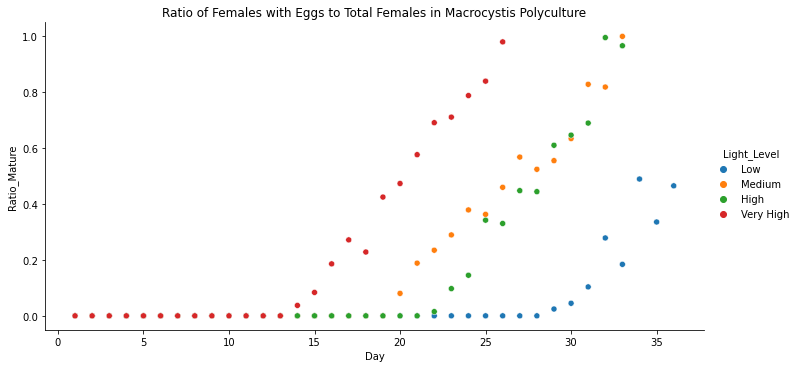

In [23]:
#Plot the proportion of females with eggs against day since spores were settled and light level

sns.relplot(data=et_macro_mono, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Ratio of Females with Eggs to Total Females in Macrocystis Monoculture")
sns.relplot(data=et_macro_poly, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Ratio of Females with Eggs to Total Females in Macrocystis Polyculture")

In [24]:
egg_timing_egre = egg_timing_good[egg_timing_good["Species"].isin(['Egregia'])] #subset so that the data only includes Macro
et_egre_mono = egg_timing_egre[egg_timing_egre["Culture_Type"].isin(['Mono'])] #subset so that the data only includes Monocultures of Macro\
et_egre_poly = egg_timing_egre[egg_timing_egre["Culture_Type"].isin(['Poly'])] #subset so that the data only includes Polycultures of Macro

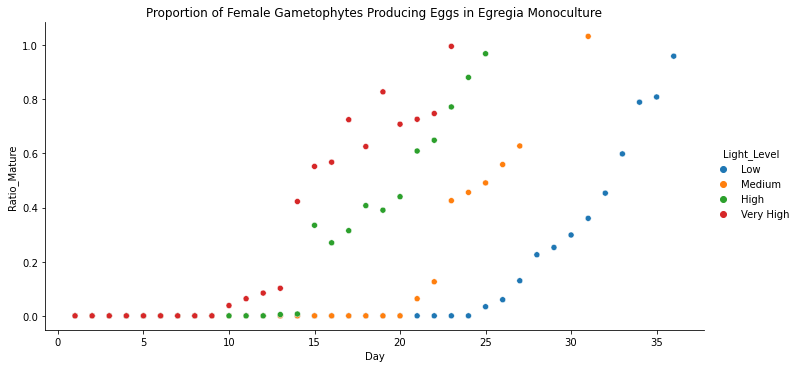

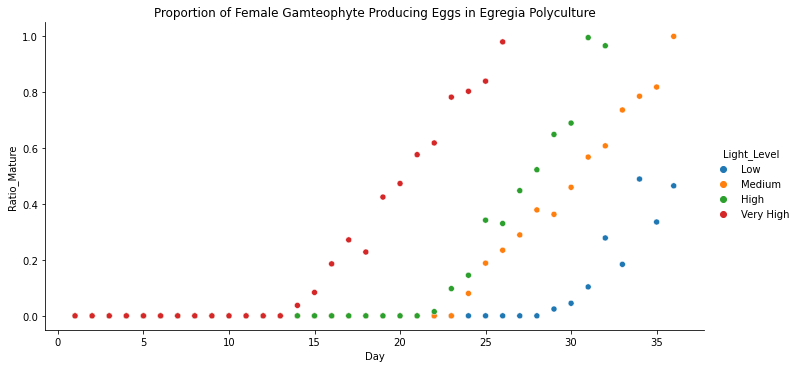

In [25]:
#graph the raw data
sns.relplot(data=et_egre_mono, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Proportion of Female Gametophytes Producing Eggs in Egregia Monoculture")
sns.relplot(data=et_egre_poly, x= "Day", y="Ratio_Mature", hue="Light_Level", aspect = 2).set(title="Proportion of Female Gamteophyte Producing Eggs in Egregia Polyculture")


In [26]:
#Test for Normality

In [27]:
#Test for Homoscedasticity

In [28]:
#Perform ANOVAs

Conclusions

Future Work